<a href="https://colab.research.google.com/github/VictorBenoiston/convolutional_neural_network_10_classes/blob/main/3rd_embedded_systems_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN para classificar o conjunto de dados Cifar-10 (Imagens)


In [111]:
NOME = "Victor Benoiston Jales de Oliveira"

In [8]:
print('Atividade de:', NOME)

Atividade de: Victor Benoiston Jales de Oliveira


## Importar Bibliotecas

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.utils import to_categorical

## Importar e inspecionar conjunto de dados

Cifar-10 repository: https://www.cs.toronto.edu/~kriz/cifar.html





In [82]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [6]:
print(x_train.shape, y_train.shape)
print(x_test.shape, x_train.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (50000, 32, 32, 3)


- A forma dos dados da imagem é: `(#images, img_heigth, img_width, #channels)`, onde os canais estão no formato RGB (vermelho, verde, azul).
- A forma dos rótulos é `(#images, label)`, onde label vai de 0 a 9.

In [7]:
x_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

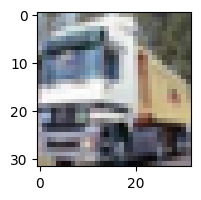

In [8]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[1]);

In [112]:
y_train[1][0]

9

    Os rótulos CIFAR são arrays, e é por isso que você precisa do índice extra

In [10]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
class_names[9] # The List's index is the label

'truck'

## **Questão 1:** Preencha o código a função `print_class_name` a seguir. Essa função recebe como entrada o índices da classe (entre 0 e 9) e retorna o nome da classe.

In [12]:
def print_class_name(i):
    print(f'Label {c} - {class_names[c]}')


# Testing the function
for c in range (0, len(class_names)):
  print_class_name(c)

Label 0 - airplane
Label 1 - automobile
Label 2 - bird
Label 3 - cat
Label 4 - deer
Label 5 - dog
Label 6 - frog
Label 7 - horse
Label 8 - ship
Label 9 - truck


In [13]:
def plot_train_img(img, size=2):
  print_class_name(img)

  plt.figure(figsize=(size,size))
  plt.imshow(x_train[img])
  plt.axis('off')
  plt.show()

Label 9 - truck


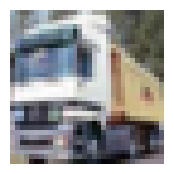

In [14]:
plot_train_img(1) # A saída deve ser o número do label, seguida pelo nome da classe e por fim a imagem

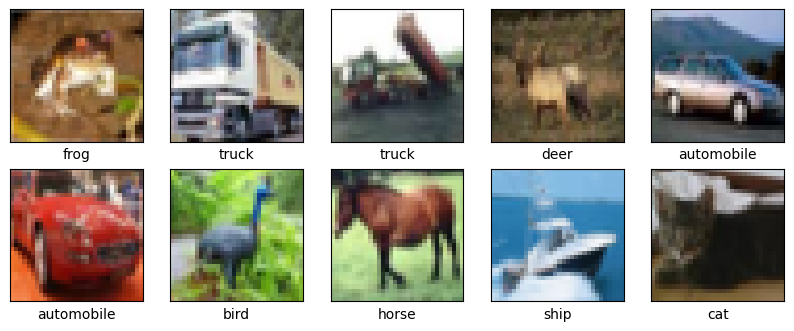

In [15]:
#Função que mostra todas as classes
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

Observe que as imagens são coloridas, não centralizadas e com fundos diferentes

## Conjunto de dados de pré-processamento

In [16]:
x_train.max()

255

In [17]:
x_train.min()

0

In [18]:
VALUE = 255

In [131]:
# Normalize pixel values to be between 0 and 1
train_images = x_train / VALUE
test_images = x_test / VALUE

In [57]:
y_train.shape

(50000, 1)

In [20]:
x_test.max()

255

In [83]:
y_train.shape

(50000, 1)

In [119]:
num_classes = len(class_names)

y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_train_encoded.shape

(50000, 10)

In [121]:
val_images = x_train[:5_000]
val_labels = y_train[:5_000]

val_labels_encoded = to_categorical(y_train[:5_000], num_classes=num_classes)
print(val_images.shape, val_labels_encoded.shape)
# val_labels.shape

(5000, 32, 32, 3) (5000, 10)


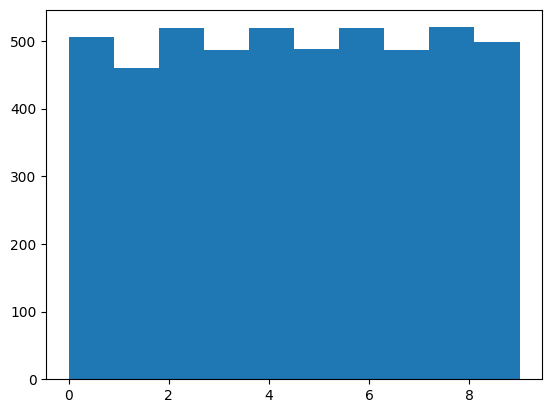

In [54]:
plt.hist(y_train[:5_000]);

In [127]:
train_images = x_train[5_000:]
train_labels = y_train_encoded[5_000:]
print(train_images.shape, train_labels.shape)

(45000, 32, 32, 3) (45000, 10)


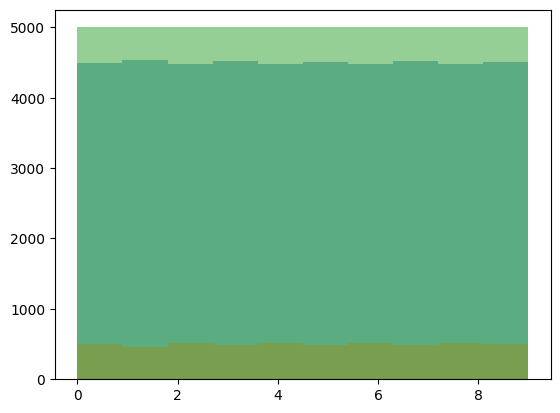

In [25]:
plt.hist(train_labels, alpha=0.5)
plt.hist(val_labels, alpha=0.5)
plt.hist(y_train, alpha=0.5);

## Criar arquitetura de modelo e compilar

In [124]:
LAYER_ACTIVATION = 'relu'
LAST_LAYER_ACTIVATION = 'softmax'
NUMBER_FLATTEN_PIXELS = 64
OUTPUT_LAYER_NEURONS = 10

LOSS = 'categorical_crossentropy'
OPT = tf.keras.optimizers.Adam()


In [105]:
model = Sequential()

model.add(Conv2D(
    input_shape=(32, 32, 3),
    filters=32,
    kernel_size=(3,3),
    activation=LAYER_ACTIVATION)
)
model.add(MaxPool2D(2, 2))

model.add(Conv2D(64, (3,3), activation=LAYER_ACTIVATION))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(NUMBER_FLATTEN_PIXELS, activation=LAYER_ACTIVATION))
model.add(Dense(OUTPUT_LAYER_NEURONS, activation=LAST_LAYER_ACTIVATION))

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 2304)              0         
                                                                 
 dense_18 (Dense)            (None, 64)               

In [125]:
# Compile the model
model.compile(optimizer=OPT,
              loss=LOSS,
              metrics=['accuracy'])

## Treinamento

In [126]:
NUM_EPOCHS = 10

In [108]:
train_labels.shape

(45000, 10)

In [133]:
# Fit the model
history = model.fit(train_images,
                    train_labels,
                    epochs=NUM_EPOCHS,
                    validation_data=(val_images, val_labels)
)

ValueError: ignored

In [123]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

NameError: ignored

## Evaluate Model

In [ ]:
print("Train data: ", model.evaluate(train_images, train_labels)[1])
print("Eval data: ", model.evaluate(val_images, val_labels)[1])
print("Test data: ", model.evaluate(test_images, test_labels)[1])

**Precisão**
- Treino: +90%;
- Validação: 68%-70%
- Teste: 66%-68%

In [ ]:
predictions = np.argmax(model.predict(test_images), axis=-1)
predictions.shape

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(test_labels, predictions, target_names=class_names))

In [ ]:
confusion_matrix(test_labels,predictions)

In [ ]:
class_names

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(test_labels,predictions), cmap='Blues', annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names);